In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import tensorflow as tf


data = pd.read_csv('./data_labels_mainData.csv')

In [ ]:


train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

In [3]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [4]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

In [5]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.__version__

'2.12.0'

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [5]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

NameError: name 'train_data' is not defined

In [ ]:
train_data.dtypes

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [5]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

NameError: name 'test_data' is not defined

In [ ]:
model.evaluate(test_generator)

In [6]:
label_names = {'fibroblast' : 0, 'inflammatory' : 1, 'epithelial' : 2, 'other' : 3}

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(25,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# VGG Model

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [ ]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [ ]:
import tensorflow as tf

model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

In [ ]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
reg_lambda = 0.001

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5), #0.2
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_2 = model_VGG_2.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'], 
                    history_VGG_2.history['categorical_accuracy'], history_VGG_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [169]:
test_data['cellType'] = test_data['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 4 classes.


In [ ]:
model_VGG_2.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(25,4))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_2.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [9]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [ ]:

reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3.compile(optimizer='adam'
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_3 = model_VGG_3.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3.history['loss'], history_VGG_3.history['val_loss'], 
                    history_VGG_3.history['categorical_accuracy'], history_VGG_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
model_VGG_3.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_3.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [ ]:

reg_lambda = 0.001

model_VGG_3_reg = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3_reg.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_3_reg = model_VGG_3_reg.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3_reg.history['loss'], history_VGG_3_reg.history['val_loss'], 
                    history_VGG_3_reg.history['categorical_accuracy'], history_VGG_3_reg.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
model_VGG_3_reg.evaluate(test_generator)

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_3_reg.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

# TESTING IF THIS MODEL IS BETTER


In [170]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [15]:

reg_lambda = 0.001

modelAllIn1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [16]:
modelAllIn1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history_modelAllIn1 = modelAllIn1.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)


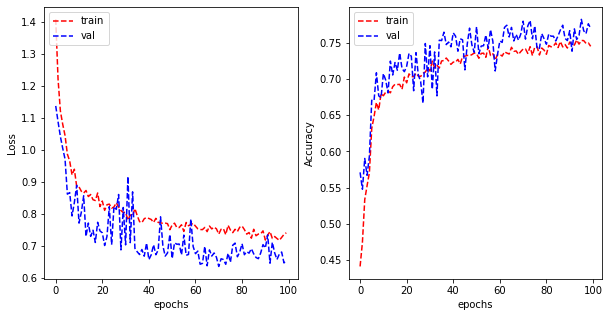

In [17]:

plot_learning_curve(history_modelAllIn1.history['loss'], history_modelAllIn1.history['val_loss'], 
                    history_modelAllIn1.history['categorical_accuracy'], history_modelAllIn1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [18]:
modelAllIn1.evaluate(test_generator)

1980/1980 [==============================] - 6s 3ms/step - loss: 0.6933 - categorical_accuracy: 0.7545


[0.6933382153511047, 0.7545454502105713]

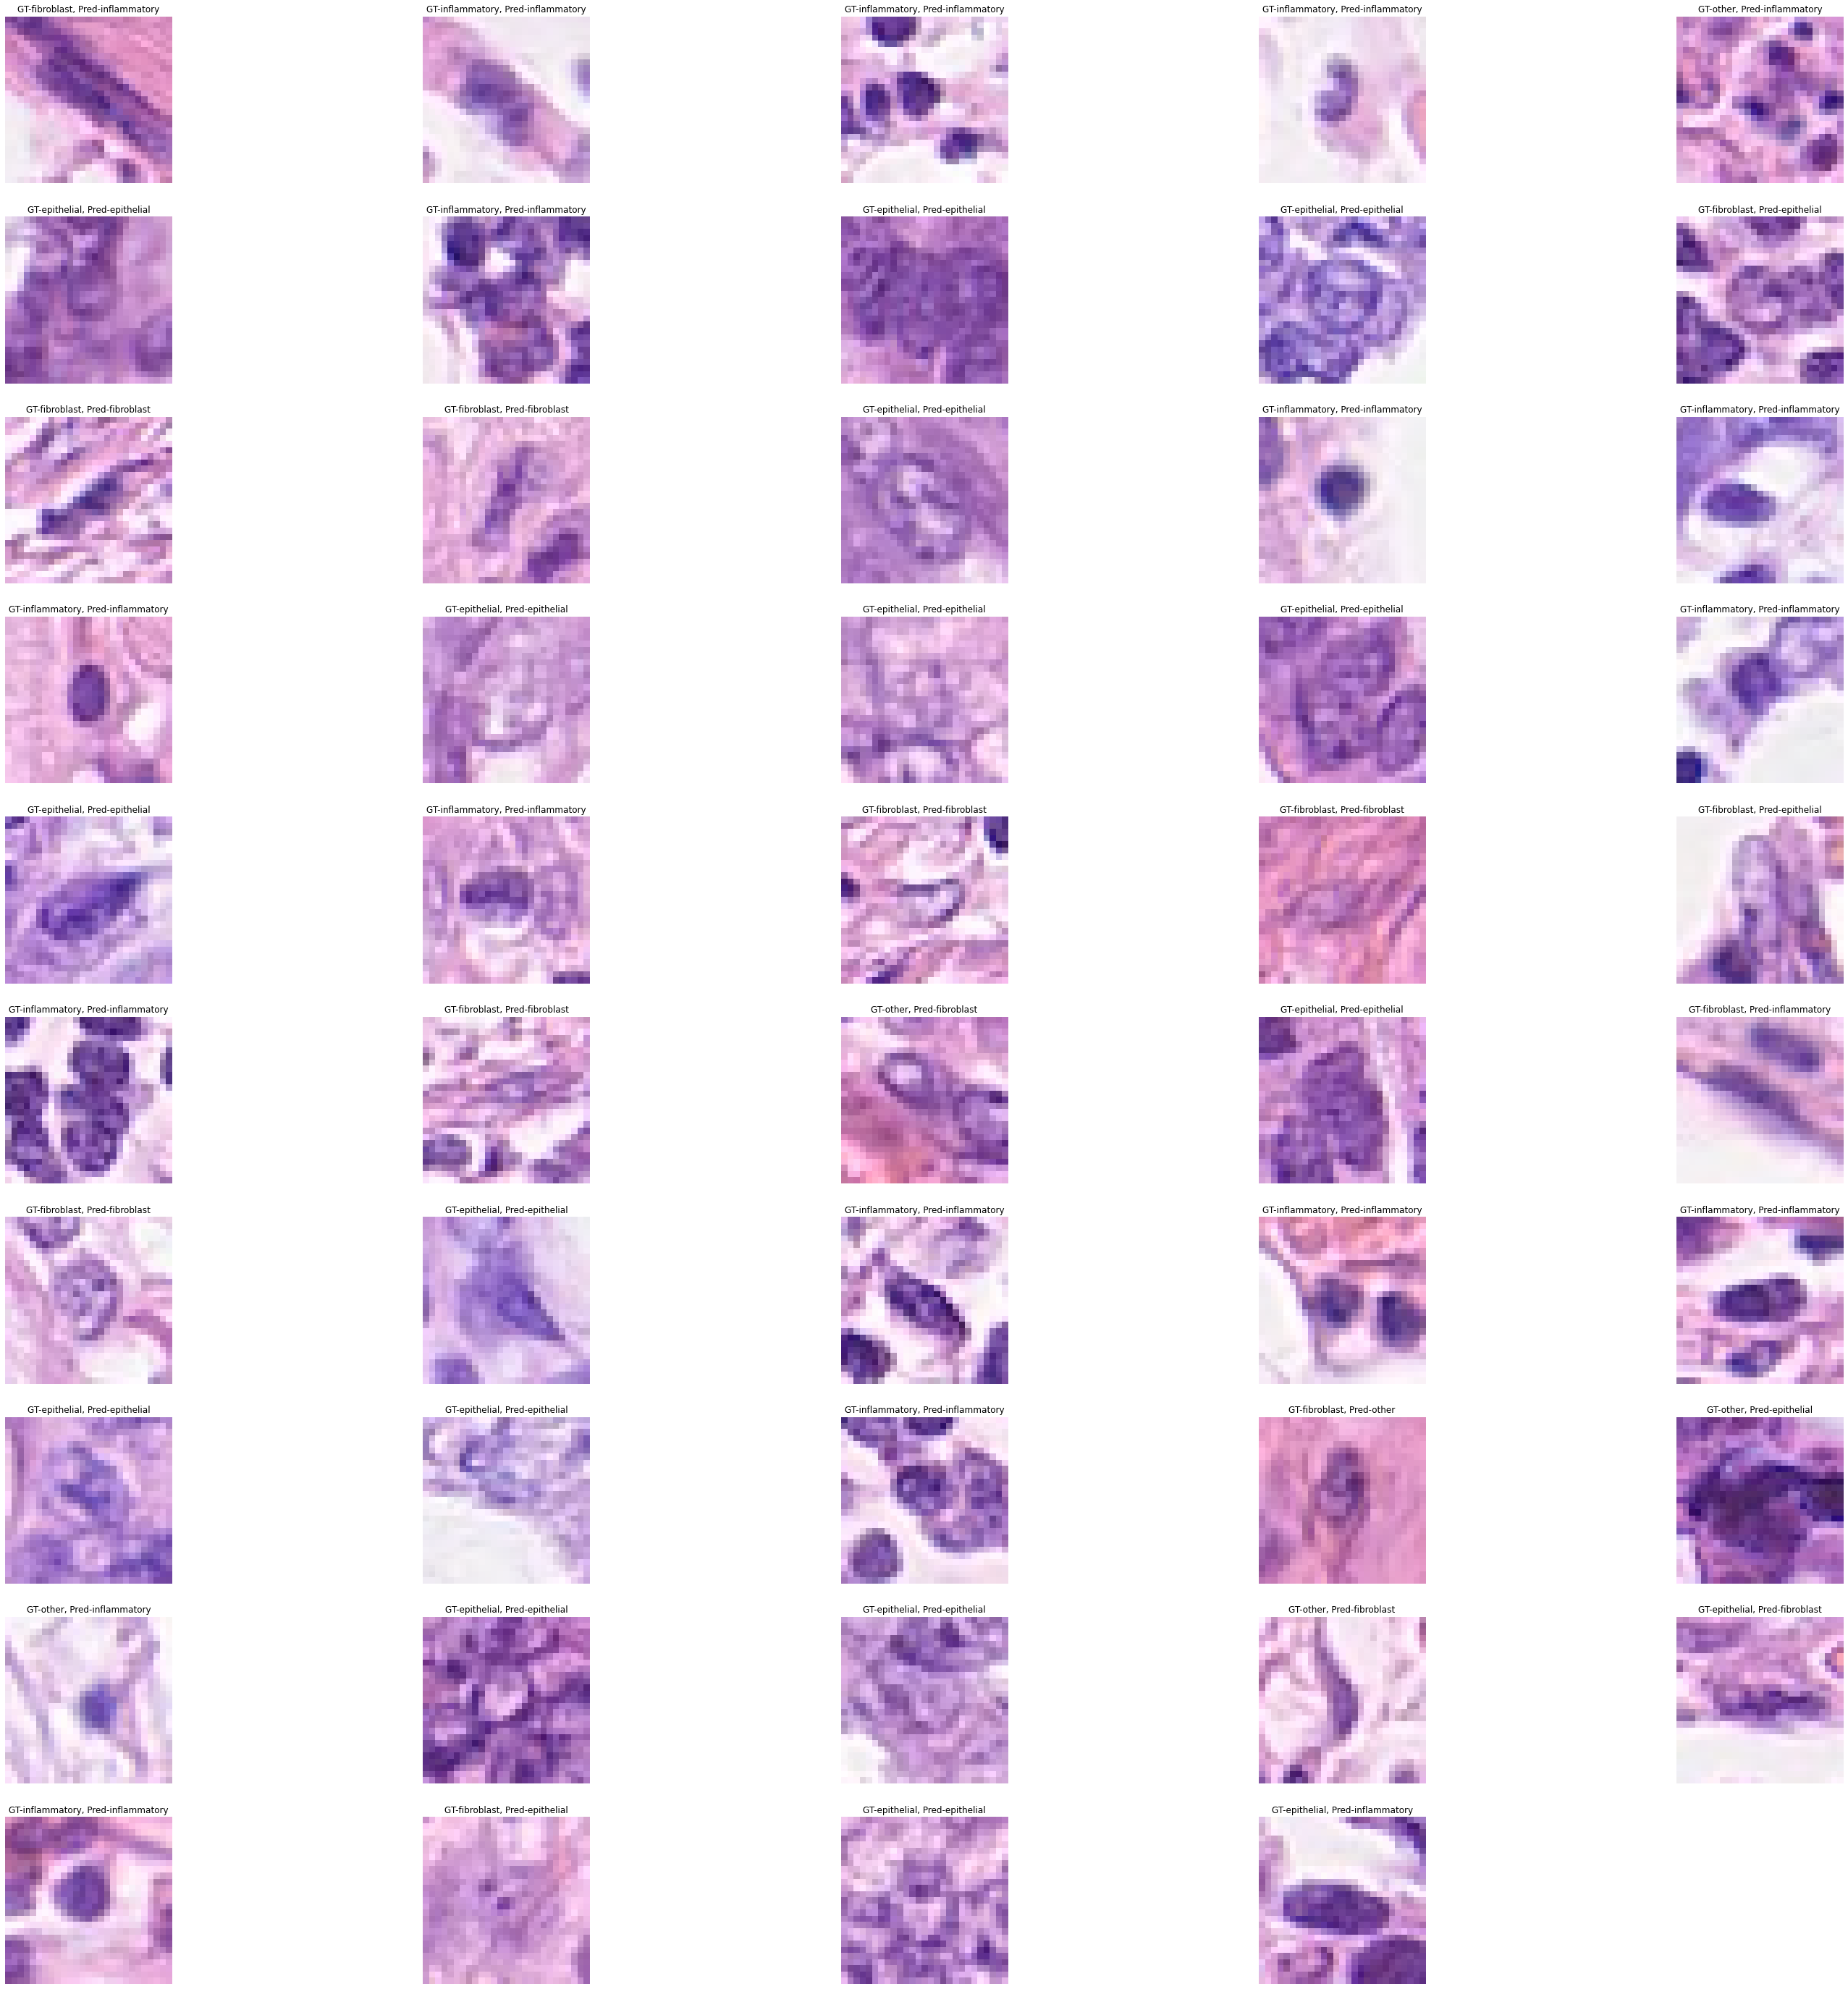

In [19]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelAllIn1.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [171]:
#reg_lambda = 0.001
reg_lambda = 0.001

modelDept = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),


    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
#     # Additional block
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
])


#modelDept.compile(optimizer='adam',
 #             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  #            metrics=['categorical_accuracy'])

In [172]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

def lr_schedule(epoch):
    lr = 15e-4 #1e-3 
    if epoch > 20:
        lr *= 0.5
    if epoch > 40:
        lr *= 0.5
    return lr

optimizer = Adam()
modelDept.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['categorical_accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)

history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, 
                                  verbose=1, callbacks=[early_stop, lr_scheduler])#, batch_size=64) #  
#history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

Epoch 1/100
186/186 [==============================] - 19s 88ms/step - loss: 2.1935 - categorical_accuracy: 0.5390 - val_loss: 3.5790 - val_categorical_accuracy: 0.4093 - lr: 0.0015
Epoch 2/100
186/186 [==============================] - 16s 88ms/step - loss: 1.8371 - categorical_accuracy: 0.6306 - val_loss: 2.4951 - val_categorical_accuracy: 0.4103 - lr: 0.0015
Epoch 3/100
186/186 [==============================] - 17s 89ms/step - loss: 1.6516 - categorical_accuracy: 0.6529 - val_loss: 1.6188 - val_categorical_accuracy: 0.6225 - lr: 0.0015
Epoch 4/100
186/186 [==============================] - 16s 86ms/step - loss: 1.4996 - categorical_accuracy: 0.6682 - val_loss: 1.8362 - val_categorical_accuracy: 0.5457 - lr: 0.0015
Epoch 5/100
186/186 [==============================] - 17s 89ms/step - loss: 1.3796 - categorical_accuracy: 0.6840 - val_loss: 1.2516 - val_categorical_accuracy: 0.7473 - lr: 0.0015
Epoch 6/100
186/186 [==============================] - 16s 87ms/step - loss: 1.2847 - cate

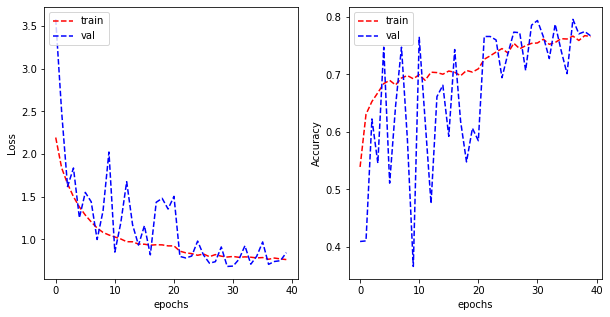

In [173]:

plot_learning_curve(history_modelDept.history['loss'], history_modelDept.history['val_loss'], 
                    history_modelDept.history['categorical_accuracy'], history_modelDept.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

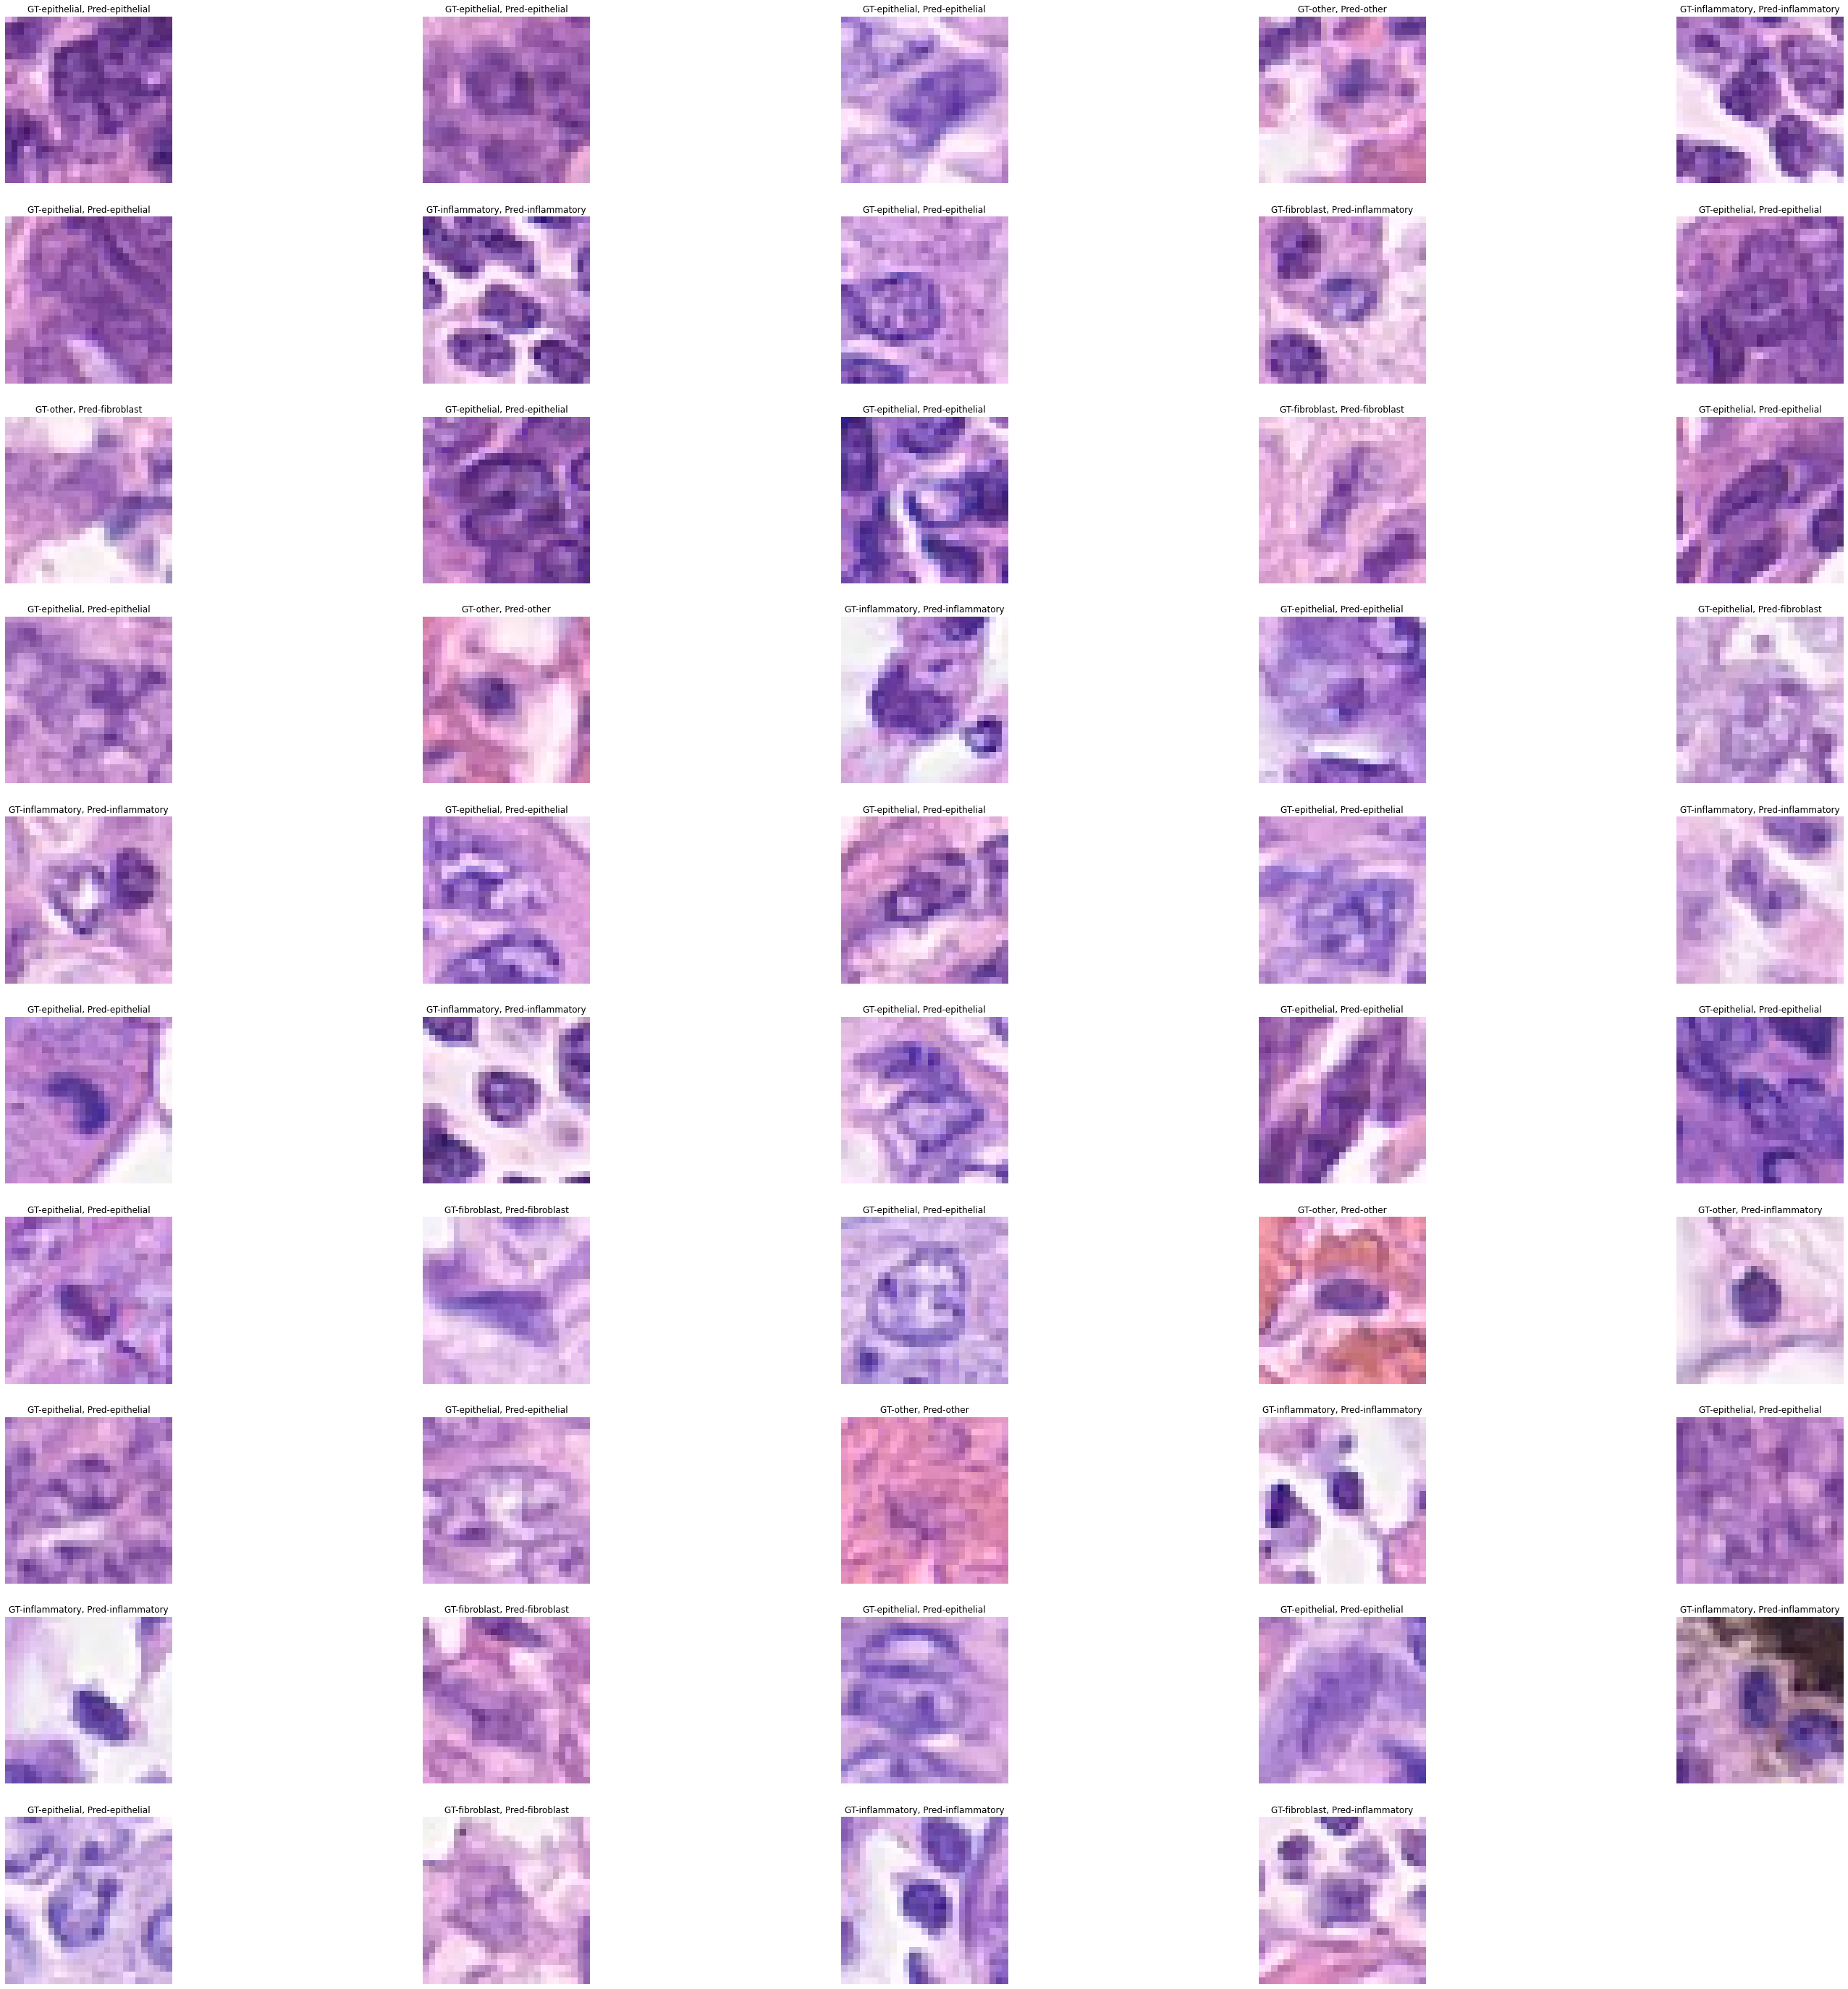

In [118]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelDept.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [174]:
modelDept.evaluate(test_generator)

1980/1980 [==============================] - 9s 5ms/step - loss: 0.9351 - categorical_accuracy: 0.7556


[0.935106098651886, 0.7555555701255798]

In [133]:
modelDept.evaluate(test_generator)

1980/1980 [==============================] - 15s 8ms/step - loss: 0.6967 - categorical_accuracy: 0.8025


[0.6966766119003296, 0.8025252819061279]

In [119]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(model, data_generator):
    true_labels = data_generator.classes
    predictions = model.predict(data_generator)
    predicted_labels = np.argmax(predictions, axis=1)
    
    precision = precision_score(true_labels, predicted_labels, average='macro')
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    
    return precision, recall, f1


In [120]:
precision, recall, f1 = calculate_metrics(modelDept, test_generator)

1980/1980 [==============================] - 11s 5ms/step


In [121]:
print(precision, recall, f1)

0.25335683735774206 0.25596289315299914 0.2525479200132007


# Further improvements

In [185]:
# Define constants
IMG_SIZE = 27
NUM_CHANNELS = 3
OUTPUT_CLASSES = 4
BATCH_SIZE = 32
REG_LAMBDA = 0.001
LEARNING_RATE = 15e-4 #1e-3
EPOCHS = 100
PATIENCE = 20

In [188]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    data_format='channels_last',
    rotation_range=15, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    data_format='channels_last'
)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./patch_images/',
    x_col="ImageName",
    y_col="cellType",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [189]:
#reg_lambda = 0.001
reg_lambda = 0.001

modelDept = tf.keras.Sequential([
    #VGG block 1
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
     #                      kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

    tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                       kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),


    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
])
modelDept.summary()


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (None, 27, 27, 64)        1792      
                                                                 
 batch_normalization_220 (Ba  (None, 27, 27, 64)       256       
 tchNormalization)                                               
                                                                 
 conv2d_221 (Conv2D)         (None, 27, 27, 64)        36928     
                                                                 
 batch_normalization_221 (Ba  (None, 27, 27, 64)       256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                     

In [190]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1, min_lr=1e-6)
optimizer = Adam()

modelDept.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['categorical_accuracy'])

history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, 
                                  verbose=1, callbacks=[early_stop, reduce_lr])#, batch_size=64) #  
#history_modelDept = modelDept.fit(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

Epoch 1/100
186/186 [==============================] - 28s 142ms/step - loss: 2.2419 - categorical_accuracy: 0.5676 - val_loss: 3.1292 - val_categorical_accuracy: 0.4093 - lr: 0.0010
Epoch 2/100
186/186 [==============================] - 25s 134ms/step - loss: 1.9204 - categorical_accuracy: 0.6203 - val_loss: 2.9066 - val_categorical_accuracy: 0.4462 - lr: 0.0010
Epoch 3/100
186/186 [==============================] - 25s 134ms/step - loss: 1.7716 - categorical_accuracy: 0.6550 - val_loss: 2.2823 - val_categorical_accuracy: 0.4017 - lr: 0.0010
Epoch 4/100
186/186 [==============================] - 25s 133ms/step - loss: 1.6634 - categorical_accuracy: 0.6545 - val_loss: 1.7807 - val_categorical_accuracy: 0.5407 - lr: 0.0010
Epoch 5/100
186/186 [==============================] - 26s 138ms/step - loss: 1.5211 - categorical_accuracy: 0.6758 - val_loss: 1.3820 - val_categorical_accuracy: 0.6908 - lr: 0.0010
Epoch 6/100
186/186 [==============================] - 25s 135ms/step - loss: 1.4099 

Epoch 86/100
186/186 [==============================] - 30s 160ms/step - loss: 0.6005 - categorical_accuracy: 0.8114 - val_loss: 0.5411 - val_categorical_accuracy: 0.8368 - lr: 1.2500e-04
Epoch 87/100
186/186 [==============================] - 30s 161ms/step - loss: 0.5868 - categorical_accuracy: 0.8201 - val_loss: 0.5398 - val_categorical_accuracy: 0.8327 - lr: 1.2500e-04
Epoch 88/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5813 - categorical_accuracy: 0.8198 - val_loss: 0.5819 - val_categorical_accuracy: 0.8151 - lr: 1.2500e-04
Epoch 89/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5883 - categorical_accuracy: 0.8179 - val_loss: 0.5937 - val_categorical_accuracy: 0.8196 - lr: 1.2500e-04
Epoch 90/100
186/186 [==============================] - 28s 151ms/step - loss: 0.5862 - categorical_accuracy: 0.8206 - val_loss: 0.5391 - val_categorical_accuracy: 0.8343 - lr: 1.2500e-04
Epoch 91/100
186/186 [==============================] - 28s 

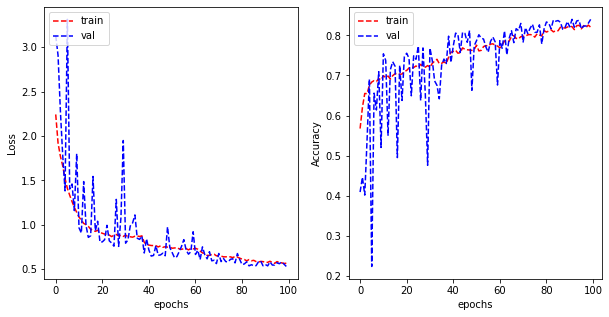

In [191]:
plot_learning_curve(history_modelDept.history['loss'], history_modelDept.history['val_loss'], 
                    history_modelDept.history['categorical_accuracy'], history_modelDept.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [192]:
test_data['cellType'] = test_data['cellType'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

modelDept.evaluate(test_generator)

Found 1980 validated image filenames belonging to 4 classes.
1980/1980 [==============================] - 9s 5ms/step - loss: 0.6117 - categorical_accuracy: 0.8187


[0.611672043800354, 0.818686842918396]

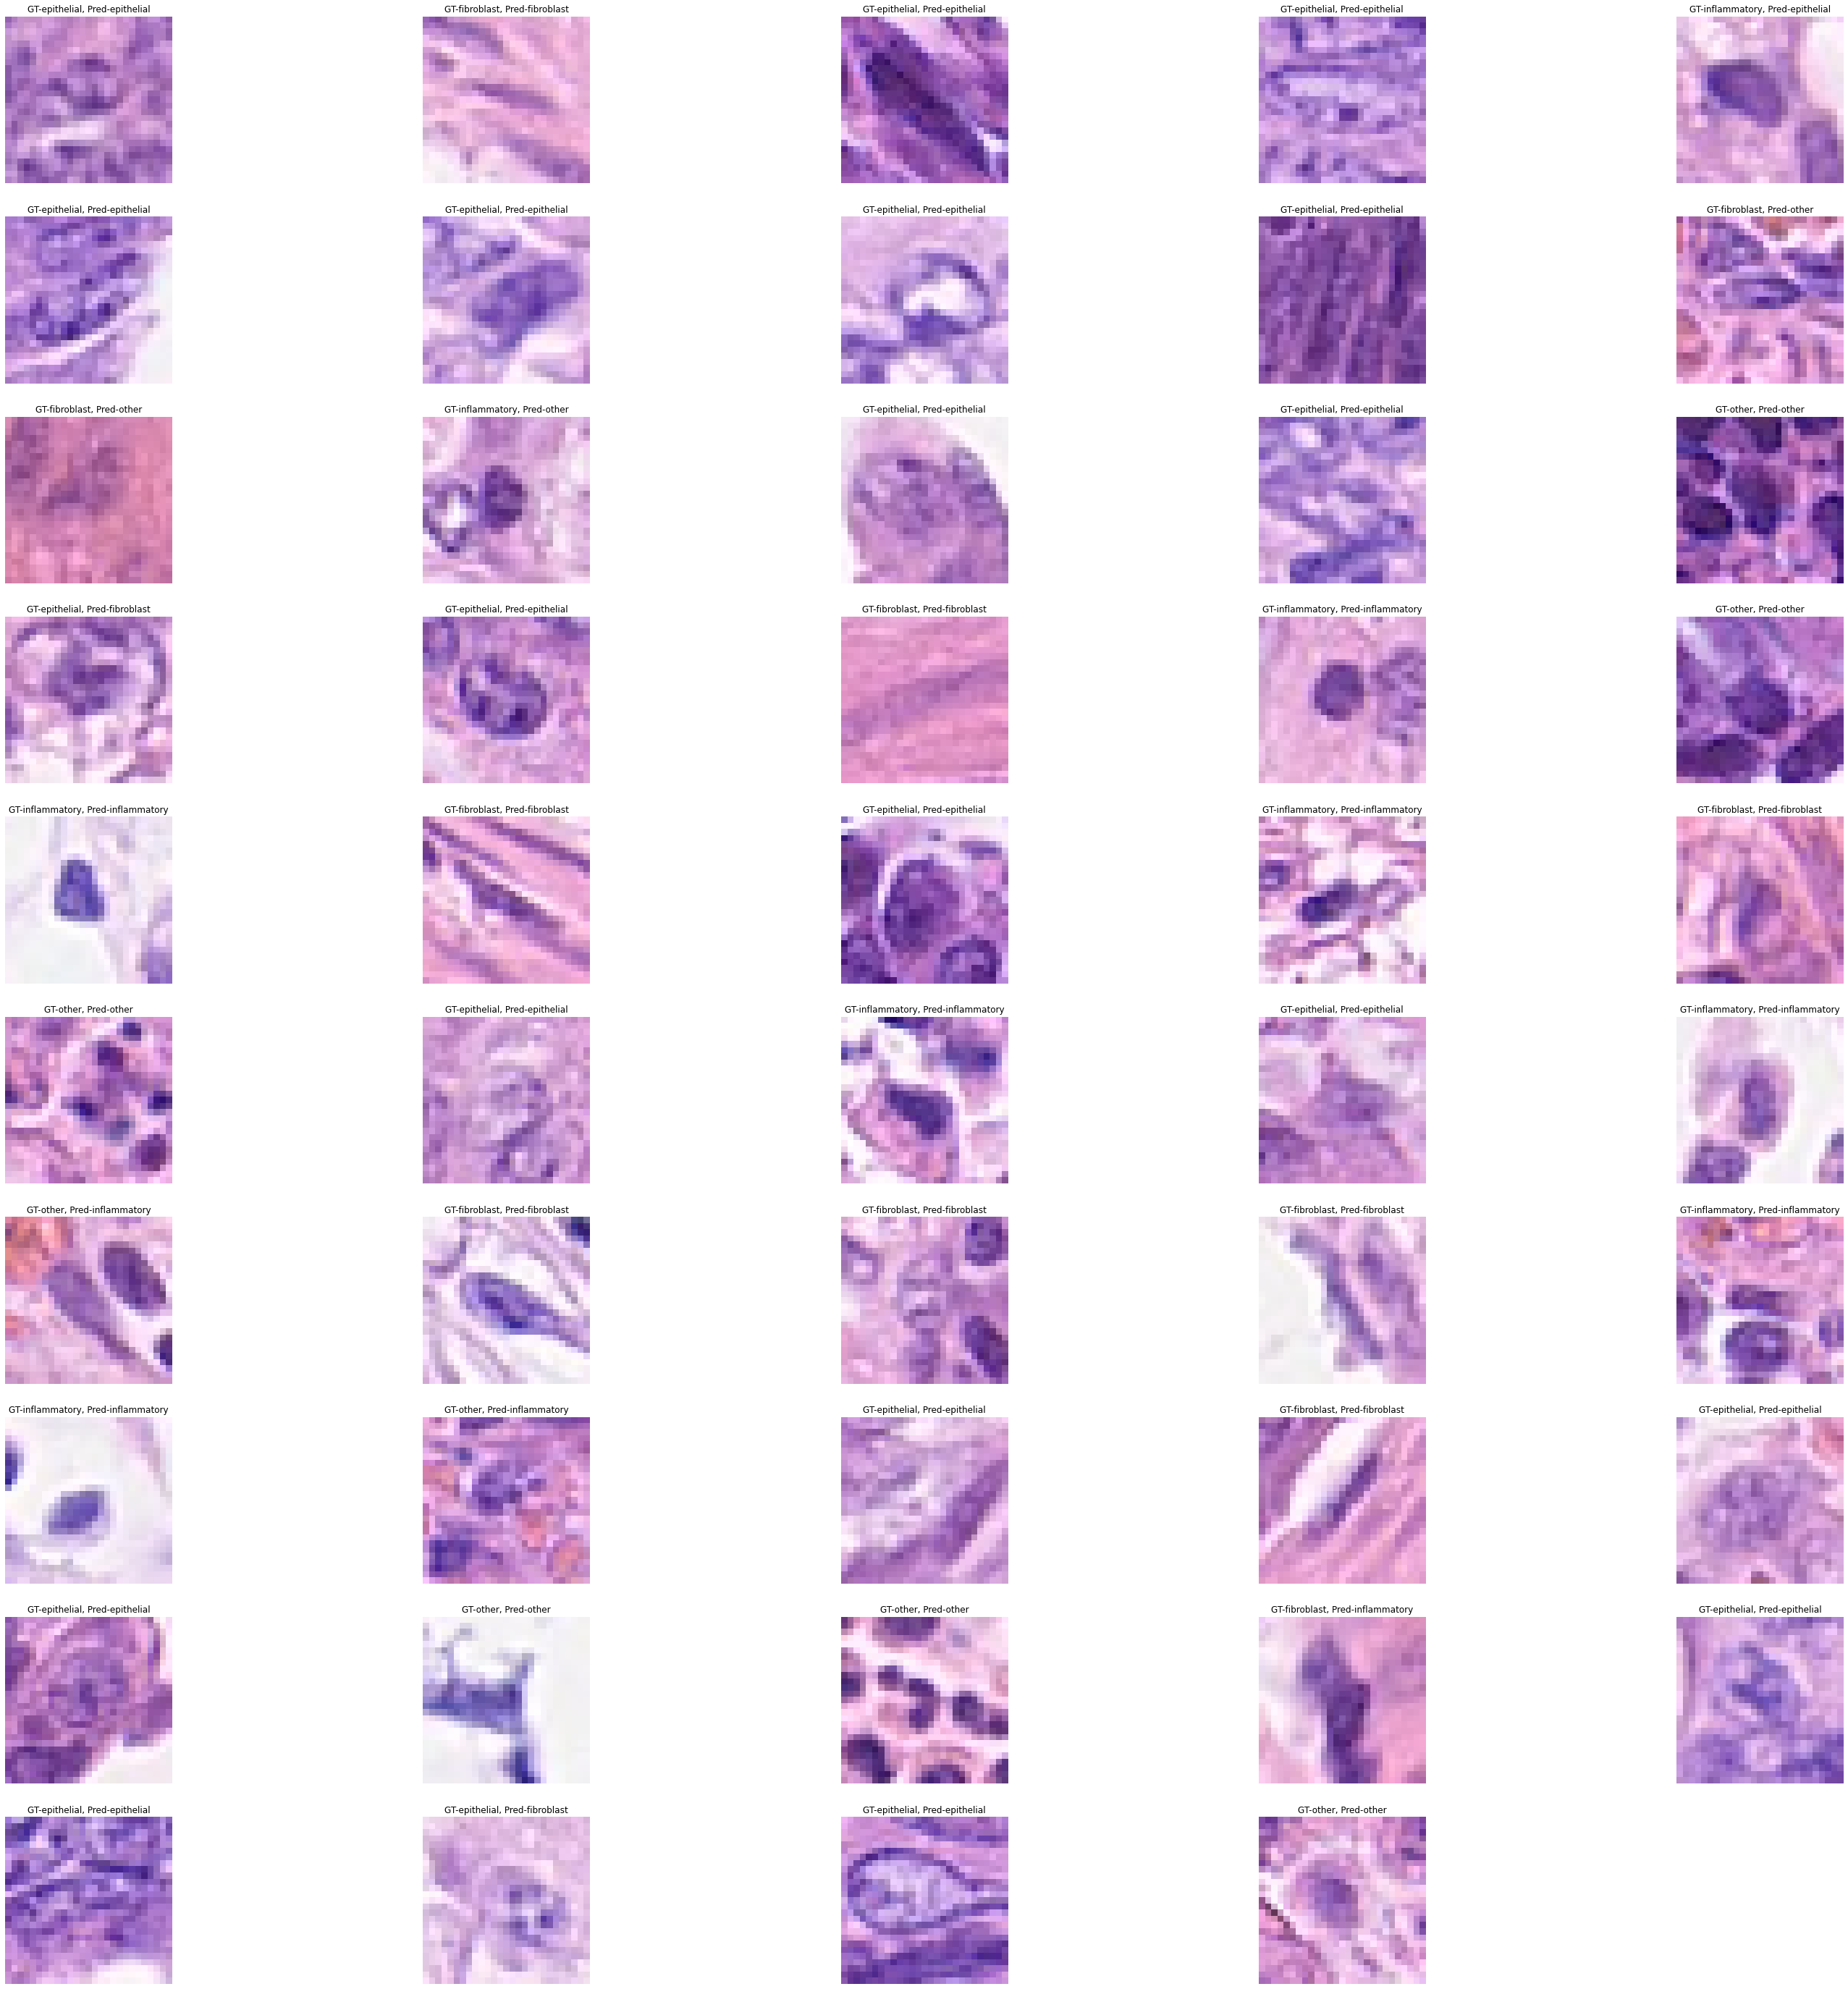

In [184]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = modelDept.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
https://github.com/shabbeersh/RCCNet/blob/master/Src/RCCNet.py


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('./data_labels_mainData.csv')

INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [22]:
import tensorflow as tf

model_isCancerous_baseline = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])


In [23]:
model_isCancerous_baseline.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [25]:
history_isCancerous_baseline = model_isCancerous_baseline.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=1)

Epoch 1/50
186/186 [==============================] - 6s 29ms/step - loss: 0.6356 - categorical_accuracy: 0.6424 - val_loss: 0.5937 - val_categorical_accuracy: 0.8060
Epoch 2/50
186/186 [==============================] - 4s 21ms/step - loss: 0.5523 - categorical_accuracy: 0.7487 - val_loss: 0.5505 - val_categorical_accuracy: 0.7686
Epoch 3/50
186/186 [==============================] - 4s 20ms/step - loss: 0.4982 - categorical_accuracy: 0.7950 - val_loss: 0.4620 - val_categorical_accuracy: 0.8044
Epoch 4/50
186/186 [==============================] - 4s 20ms/step - loss: 0.4577 - categorical_accuracy: 0.8167 - val_loss: 0.4225 - val_categorical_accuracy: 0.8464
Epoch 5/50
186/186 [==============================] - 3s 17ms/step - loss: 0.4252 - categorical_accuracy: 0.8300 - val_loss: 0.4176 - val_categorical_accuracy: 0.8444
Epoch 6/50
186/186 [==============================] - 3s 15ms/step - loss: 0.3970 - categorical_accuracy: 0.8430 - val_loss: 0.3746 - val_categorical_accuracy: 0.861

Epoch 50/50
186/186 [==============================] - 3s 14ms/step - loss: 0.3004 - categorical_accuracy: 0.8794 - val_loss: 0.3086 - val_categorical_accuracy: 0.8737


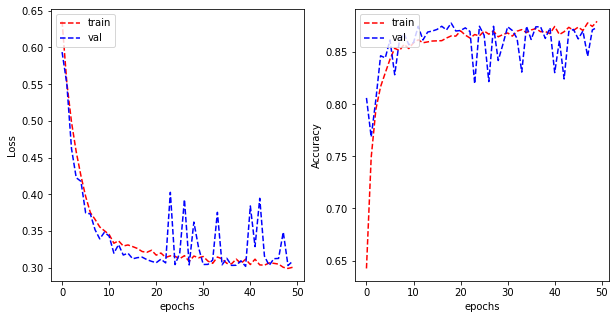

In [26]:
plot_learning_curve(history_isCancerous_baseline.history['loss'], history_isCancerous_baseline.history['val_loss'], 
                    history_isCancerous_baseline.history['categorical_accuracy'], history_isCancerous_baseline.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [27]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_baseline.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 3s 1ms/step - loss: 0.3116 - categorical_accuracy: 0.8687


[0.31159326434135437, 0.868686854839325]

In [28]:

model_isCancerous_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(27, 27, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.3),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax')
])
model_isCancerous_drop.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history_isCancerous_drop = model_isCancerous_drop.fit(train_generator, validation_data = validation_generator, epochs=60, verbose=1, callbacks=[reduce_lr, early_stop])

Epoch 1/60


C:\Users\Zain\anaconda3\lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


186/186 [==============================] - 6s 28ms/step - loss: 0.6728 - categorical_accuracy: 0.5799 - val_loss: 0.6484 - val_categorical_accuracy: 0.6306 - lr: 0.0100
Epoch 2/60
186/186 [==============================] - 5s 28ms/step - loss: 0.6136 - categorical_accuracy: 0.6641 - val_loss: 0.6044 - val_categorical_accuracy: 0.7120 - lr: 0.0100
Epoch 3/60
186/186 [==============================] - 5s 28ms/step - loss: 0.5441 - categorical_accuracy: 0.7313 - val_loss: 0.4690 - val_categorical_accuracy: 0.8322 - lr: 0.0100
Epoch 4/60
186/186 [==============================] - 5s 29ms/step - loss: 0.4926 - categorical_accuracy: 0.7642 - val_loss: 0.4129 - val_categorical_accuracy: 0.8398 - lr: 0.0100
Epoch 5/60
186/186 [==============================] - 6s 32ms/step - loss: 0.4697 - categorical_accuracy: 0.7795 - val_loss: 0.4049 - val_categorical_accuracy: 0.8393 - lr: 0.0100
Epoch 6/60
186/186 [==============================] - 6s 31ms/step - loss: 0.4384 - categorical_accuracy: 0.800

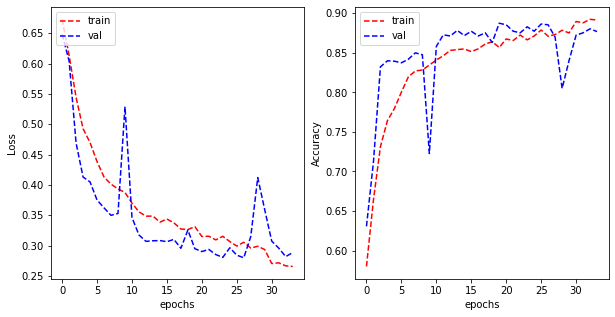

In [30]:
plot_learning_curve(history_isCancerous_drop.history['loss'], history_isCancerous_drop.history['val_loss'], 
                    history_isCancerous_drop.history['categorical_accuracy'], history_isCancerous_drop.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [31]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_drop.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 3s 2ms/step - loss: 0.2761 - categorical_accuracy: 0.8848


[0.27608054876327515, 0.8848484754562378]

In [32]:



# Get the predicted labels for the validation data
y_pred = model_isCancerous_drop.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the validation data
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cm)

# Compute the classification report
report = classification_report(y_true, y_pred)
print("Classification report:")
print(report)

# Compute the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 score:", f1)


1980/1980 [==============================] - 3s 2ms/step
Confusion matrix:
[[755 434]
 [496 295]]
Classification report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1189
           1       0.40      0.37      0.39       791

    accuracy                           0.53      1980
   macro avg       0.50      0.50      0.50      1980
weighted avg       0.52      0.53      0.53      1980

F1 score: 0.5266911457107747


In [33]:
model_isCancerous = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [34]:
model_isCancerous.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [35]:

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [36]:
history_isCancerous = model_isCancerous.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=1)

Epoch 1/50
186/186 [==============================] - 12s 63ms/step - loss: 0.6679 - categorical_accuracy: 0.5826 - val_loss: 0.6564 - val_categorical_accuracy: 0.5907
Epoch 2/50
186/186 [==============================] - 11s 61ms/step - loss: 0.6357 - categorical_accuracy: 0.6303 - val_loss: 0.6466 - val_categorical_accuracy: 0.6200
Epoch 3/50
186/186 [==============================] - 13s 68ms/step - loss: 0.5907 - categorical_accuracy: 0.6865 - val_loss: 0.5026 - val_categorical_accuracy: 0.8338
Epoch 4/50
186/186 [==============================] - 13s 72ms/step - loss: 0.5505 - categorical_accuracy: 0.7285 - val_loss: 0.4502 - val_categorical_accuracy: 0.8282
Epoch 5/50
186/186 [==============================] - 12s 63ms/step - loss: 0.5086 - categorical_accuracy: 0.7644 - val_loss: 0.4319 - val_categorical_accuracy: 0.8231
Epoch 6/50
186/186 [==============================] - 14s 73ms/step - loss: 0.4679 - categorical_accuracy: 0.7874 - val_loss: 0.3917 - val_categorical_accuracy:

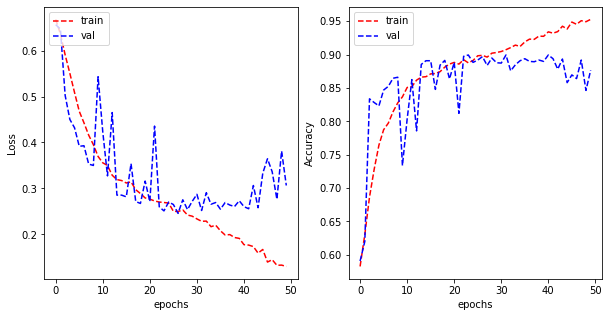

In [37]:
plot_learning_curve(history_isCancerous.history['loss'], history_isCancerous.history['val_loss'], 
                    history_isCancerous.history['categorical_accuracy'], history_isCancerous.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [38]:
reg_lambda = 0.001
model_isCancerous_3 = tf.keras.Sequential([    
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [39]:
model_isCancerous_3.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [40]:

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [41]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history_isCancerous_3 = model_isCancerous_3.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=1, callbacks=[reduce_lr, early_stop])

Epoch 1/50
186/186 [==============================] - 13s 65ms/step - loss: 1.2565 - categorical_accuracy: 0.5808 - val_loss: 1.2420 - val_categorical_accuracy: 0.5907 - lr: 0.0100
Epoch 2/50
186/186 [==============================] - 12s 66ms/step - loss: 1.2307 - categorical_accuracy: 0.6035 - val_loss: 1.1783 - val_categorical_accuracy: 0.6301 - lr: 0.0100
Epoch 3/50
186/186 [==============================] - 12s 67ms/step - loss: 1.1909 - categorical_accuracy: 0.6694 - val_loss: 1.1595 - val_categorical_accuracy: 0.7772 - lr: 0.0100
Epoch 4/50
186/186 [==============================] - 12s 66ms/step - loss: 1.1570 - categorical_accuracy: 0.6985 - val_loss: 1.0518 - val_categorical_accuracy: 0.8216 - lr: 0.0100
Epoch 5/50
186/186 [==============================] - 12s 65ms/step - loss: 1.1133 - categorical_accuracy: 0.7408 - val_loss: 1.2281 - val_categorical_accuracy: 0.5993 - lr: 0.0100
Epoch 6/50
186/186 [==============================] - 12s 67ms/step - loss: 1.0730 - categorica

186/186 [==============================] - 12s 65ms/step - loss: 0.6707 - categorical_accuracy: 0.9176 - val_loss: 0.6992 - val_categorical_accuracy: 0.9055 - lr: 0.0020
Epoch 47/50
186/186 [==============================] - 12s 65ms/step - loss: 0.6755 - categorical_accuracy: 0.9166 - val_loss: 0.6886 - val_categorical_accuracy: 0.9101 - lr: 0.0020
Epoch 48/50
186/186 [==============================] - 12s 64ms/step - loss: 0.6723 - categorical_accuracy: 0.9163 - val_loss: 0.6901 - val_categorical_accuracy: 0.9121 - lr: 0.0020
Epoch 49/50
186/186 [==============================] - 12s 64ms/step - loss: 0.6683 - categorical_accuracy: 0.9185 - val_loss: 0.6892 - val_categorical_accuracy: 0.9055 - lr: 0.0020
Epoch 50/50
186/186 [==============================] - 12s 65ms/step - loss: 0.6693 - categorical_accuracy: 0.9188 - val_loss: 0.6880 - val_categorical_accuracy: 0.9060 - lr: 0.0020


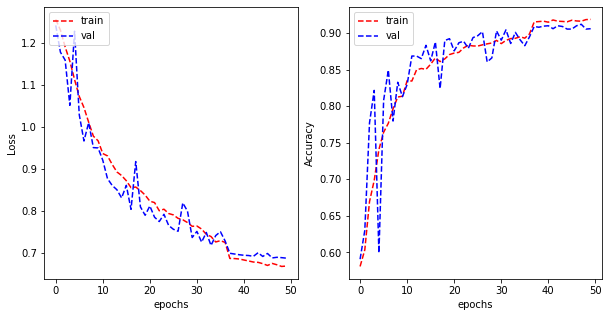

In [42]:
plot_learning_curve(history_isCancerous_3.history['loss'], history_isCancerous_3.history['val_loss'], 
                    history_isCancerous_3.history['categorical_accuracy'], history_isCancerous_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [43]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_3.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 6s 3ms/step - loss: 0.6889 - categorical_accuracy: 0.9066


[0.6888595819473267, 0.9065656661987305]

In [9]:
#ADD SOFTMAX TO LAST DENSE / REMOVE THE REGULARIZER IN FIRST DENSE
reg_lambda = 0.001
model_isCancerous_4 = tf.keras.Sequential([    
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])
model_isCancerous_4.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_isCancerous_4 = model_isCancerous_4.fit(train_generator, validation_data = validation_generator, 
                                                epochs=100, verbose=1, callbacks=[reduce_lr, early_stop])

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.
Epoch 1/100
186/186 [==============================] - 75s 400ms/step - loss: 0.6709 - categorical_accuracy: 0.5803 - val_loss: 0.6576 - val_categorical_accuracy: 0.5907 - lr: 0.0100
Epoch 2/100
186/186 [==============================] - 11s 62ms/step - loss: 0.6364 - categorical_accuracy: 0.6114 - val_loss: 0.5727 - val_categorical_accuracy: 0.6710 - lr: 0.0100
Epoch 3/100
186/186 [==============================] - 12s 62ms/step - loss: 0.5844 - categorical_accuracy: 0.7132 - val_loss: 0.7275 - val_categorical_accuracy: 0.6241 - lr: 0.0100
Epoch 4/100
186/186 [==============================] - 13s 68ms/step - loss: 0.5615 - categorical_accuracy: 0.7143 - val_loss: 0.4646 - val_categorical_accuracy: 0.7787 - lr: 0.0100
Epoch 5/100
186/186 [==============================] - 10s 56ms/step - loss: 0.5291 - categorical_accuracy: 0.7403 - val_loss: 0.4716 - val_categoric

186/186 [==============================] - 12s 66ms/step - loss: 0.2727 - categorical_accuracy: 0.8914 - val_loss: 0.2432 - val_categorical_accuracy: 0.9045 - lr: 0.0100
Epoch 46/100
186/186 [==============================] - 12s 66ms/step - loss: 0.2665 - categorical_accuracy: 0.8882 - val_loss: 0.2476 - val_categorical_accuracy: 0.8989 - lr: 0.0100
Epoch 47/100
186/186 [==============================] - 12s 64ms/step - loss: 0.2661 - categorical_accuracy: 0.8917 - val_loss: 0.2646 - val_categorical_accuracy: 0.8984 - lr: 0.0100
Epoch 48/100
186/186 [==============================] - 12s 66ms/step - loss: 0.2605 - categorical_accuracy: 0.8944 - val_loss: 0.3134 - val_categorical_accuracy: 0.8656 - lr: 0.0100
Epoch 49/100
186/186 [==============================] - 15s 80ms/step - loss: 0.2641 - categorical_accuracy: 0.8941 - val_loss: 0.2445 - val_categorical_accuracy: 0.9030 - lr: 0.0100
Epoch 50/100
186/186 [==============================] - 14s 74ms/step - loss: 0.2613 - categorical

Epoch 90/100
186/186 [==============================] - 14s 78ms/step - loss: 0.2268 - categorical_accuracy: 0.9116 - val_loss: 0.2215 - val_categorical_accuracy: 0.9131 - lr: 0.0050
Epoch 91/100
186/186 [==============================] - 15s 78ms/step - loss: 0.2255 - categorical_accuracy: 0.9096 - val_loss: 0.2348 - val_categorical_accuracy: 0.9070 - lr: 0.0050
Epoch 92/100
186/186 [==============================] - 15s 80ms/step - loss: 0.2256 - categorical_accuracy: 0.9126 - val_loss: 0.2600 - val_categorical_accuracy: 0.8984 - lr: 0.0050
Epoch 93/100
186/186 [==============================] - 14s 76ms/step - loss: 0.2240 - categorical_accuracy: 0.9124 - val_loss: 0.2245 - val_categorical_accuracy: 0.9090 - lr: 0.0050
Epoch 94/100
186/186 [==============================] - 15s 83ms/step - loss: 0.2249 - categorical_accuracy: 0.9131 - val_loss: 0.2513 - val_categorical_accuracy: 0.9010 - lr: 0.0050
Epoch 95/100
186/186 [==============================] - 16s 83ms/step - loss: 0.2238 

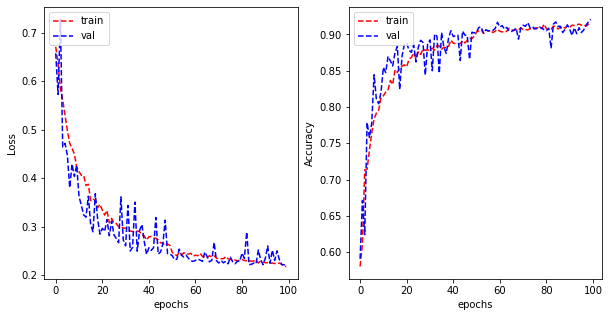

In [10]:
plot_learning_curve(history_isCancerous_4.history['loss'], history_isCancerous_4.history['val_loss'], 
                    history_isCancerous_4.history['categorical_accuracy'], history_isCancerous_4.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [11]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_4.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 28s 14ms/step - loss: 0.2266 - categorical_accuracy: 0.9141


[0.22656264901161194, 0.9141414165496826]

In [17]:
TESTData = pd.read_csv('./data_labels_extraData.csv')
TESTData['isCancerous'] = TESTData['isCancerous'].astype('str')


TESTDatagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

TESTData_generator = test_datagen.flow_from_dataframe(
        dataframe=TESTData,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_4.evaluate(TESTData_generator)

Found 10384 validated image filenames belonging to 2 classes.
10384/10384 [==============================] - 153s 15ms/step - loss: 0.5886 - categorical_accuracy: 0.7472


[0.5886178612709045, 0.7472072243690491]

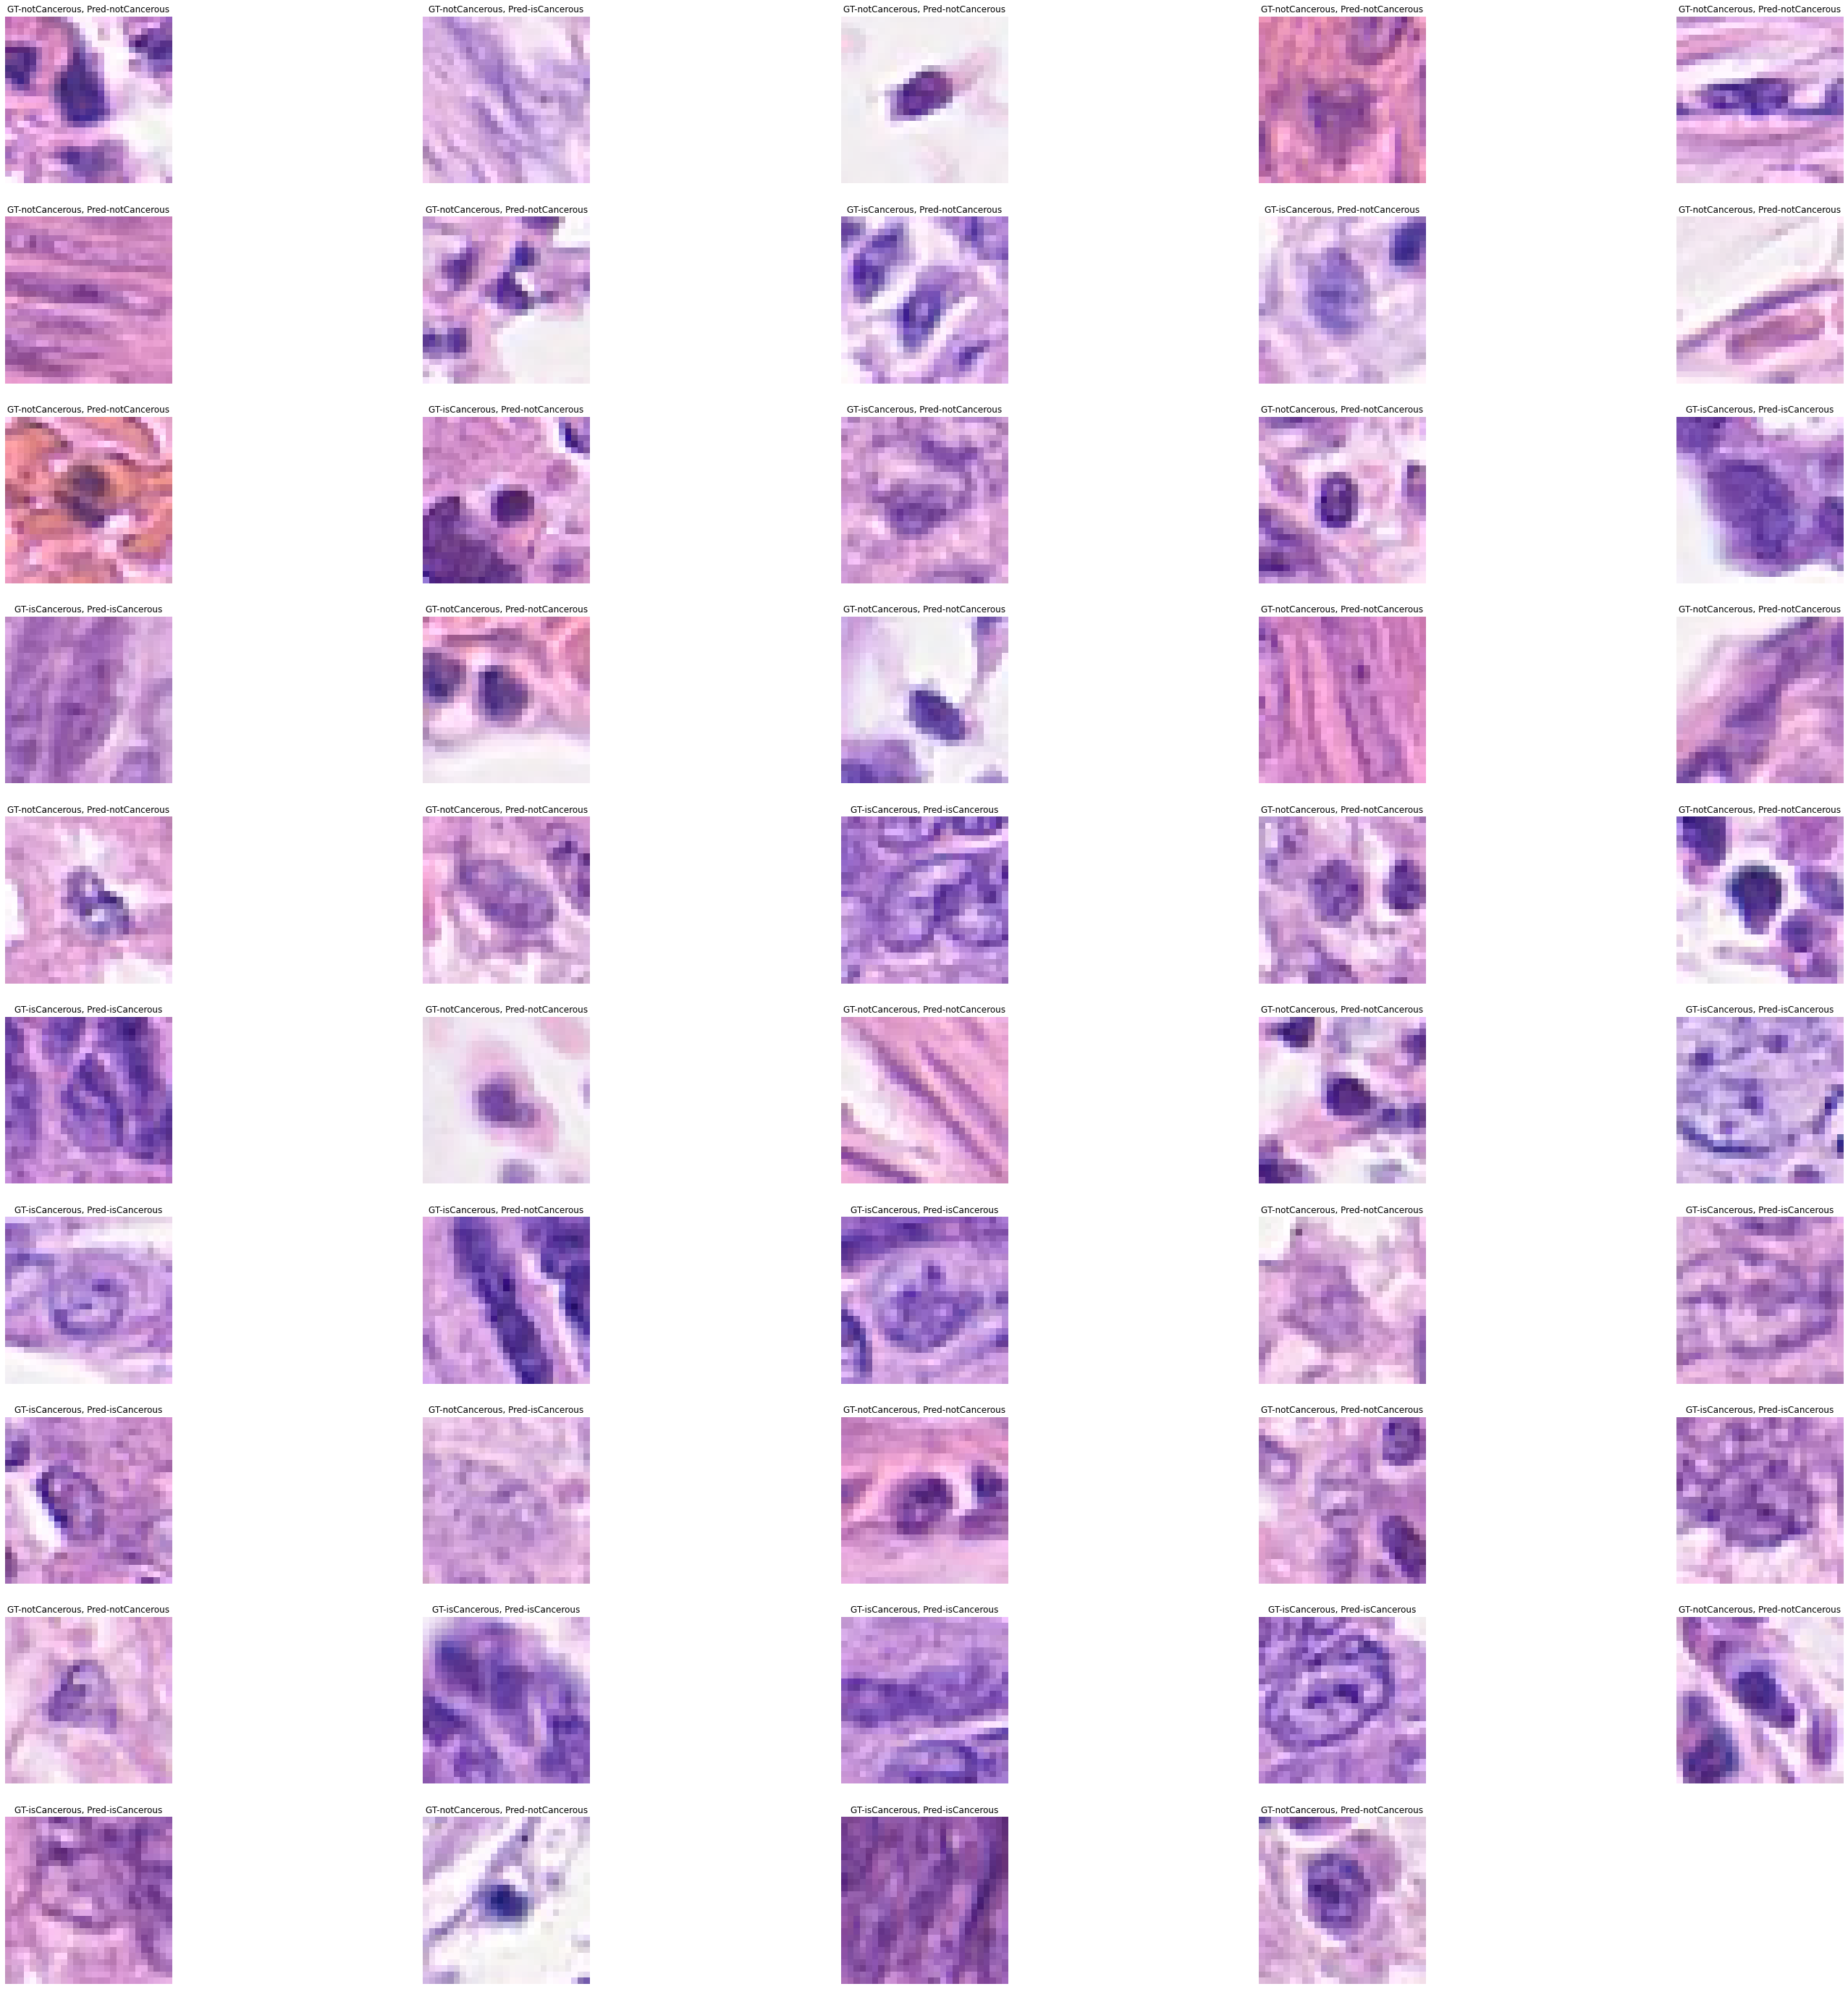

In [16]:
label_names = {'notCancerous' : 0, 'isCancerous' : 1}
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(50,50))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_isCancerous_4.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 50:
            plt.subplot(10,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [255]:
reg_lambda = 0.001
model_isCancerous = tf.keras.Sequential([
#VGG block 1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.5),

    
    #VGG block 2
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.5),
    
    #VGG block 3
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])
    
    
    #     #VGG block 1
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),

    
#     #VGG block 2
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),
    
#     #VGG block 3
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(.5),
#     tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
# ])

# #reg_lambda = 0.001
# reg_lambda = 0.001

# modelDept = tf.keras.Sequential([
#     #VGG block 1
#     #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
#      #                      kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
#                        kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

#     tf.keras.layers.BatchNormalization(),
# #     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
# #                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
#                        kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),

#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),

#     #VGG block 2
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),
    
#     #VGG block 3
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', 
#                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.Flatten(),
# #     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
# #     tf.keras.layers.Dropout(.4),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)), #128
#     tf.keras.layers.Dropout(.3),
#     tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
# ])
# modelDept.summary()


In [256]:
model_isCancerous.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

In [257]:

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, 
    data_format='channels_last',
    rotation_range=15, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    brightness_range=[0.5,1.5],
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [258]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history_isCancerous = model_isCancerous.fit(train_generator, validation_data=validation_generator, epochs=50, verbose=1, callbacks=[reduce_lr, early_stop])




Epoch 1/50
186/186 [==============================] - 34s 180ms/step - loss: 1.7047 - categorical_accuracy: 0.5432 - val_loss: 1.4601 - val_categorical_accuracy: 0.4093 - lr: 0.0100
Epoch 2/50
186/186 [==============================] - 36s 194ms/step - loss: 1.3278 - categorical_accuracy: 0.6646 - val_loss: 2.2751 - val_categorical_accuracy: 0.4113 - lr: 0.0100
Epoch 3/50
186/186 [==============================] - 35s 186ms/step - loss: 1.1779 - categorical_accuracy: 0.7793 - val_loss: 2.2917 - val_categorical_accuracy: 0.4462 - lr: 0.0100
Epoch 4/50
186/186 [==============================] - 34s 182ms/step - loss: 1.1392 - categorical_accuracy: 0.8065 - val_loss: 1.3233 - val_categorical_accuracy: 0.7423 - lr: 0.0100
Epoch 5/50
186/186 [==============================] - 37s 196ms/step - loss: 1.1158 - categorical_accuracy: 0.8103 - val_loss: 1.0753 - val_categorical_accuracy: 0.8413 - lr: 0.0100
Epoch 6/50
186/186 [==============================] - 35s 188ms/step - loss: 1.1083 - cate

Epoch 46/50
186/186 [==============================] - 31s 165ms/step - loss: 0.8183 - categorical_accuracy: 0.8690 - val_loss: 1.1713 - val_categorical_accuracy: 0.7246 - lr: 0.0100
Epoch 47/50
186/186 [==============================] - 31s 169ms/step - loss: 0.8224 - categorical_accuracy: 0.8669 - val_loss: 0.7497 - val_categorical_accuracy: 0.9030 - lr: 0.0100
Epoch 48/50
186/186 [==============================] - 32s 169ms/step - loss: 0.7991 - categorical_accuracy: 0.8760 - val_loss: 0.7444 - val_categorical_accuracy: 0.8959 - lr: 0.0100
Epoch 49/50
186/186 [==============================] - 31s 169ms/step - loss: 0.8008 - categorical_accuracy: 0.8750 - val_loss: 0.8924 - val_categorical_accuracy: 0.8292 - lr: 0.0100
Epoch 50/50
186/186 [==============================] - 32s 172ms/step - loss: 0.8018 - categorical_accuracy: 0.8711 - val_loss: 2.2607 - val_categorical_accuracy: 0.4755 - lr: 0.0100


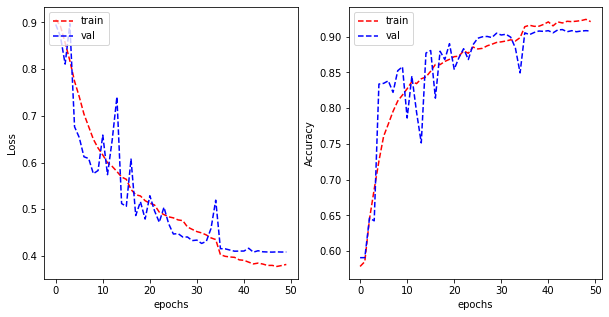

In [262]:
plot_learning_curve(history_isCancerous_3.history['loss'], history_isCancerous_3.history['val_loss'], 
                    history_isCancerous_3.history['categorical_accuracy'], history_isCancerous_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [263]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_3.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 11s 5ms/step - loss: 0.4122 - categorical_accuracy: 0.9091


[0.412152498960495, 0.9090909361839294]

In [254]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous.evaluate(test_generator)

Found 1980 validated image filenames belonging to 2 classes.
1980/1980 [==============================] - 14s 7ms/step - loss: 0.2524 - categorical_accuracy: 0.9051


[0.25239047408103943, 0.90505051612854]

In [135]:
TESTData = pd.read_csv('./data_labels_mainData.csv')
TESTData['isCancerous'] = TESTData['isCancerous'].astype('str')


TESTDatagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

TESTData_generator = test_datagen.flow_from_dataframe(
        dataframe=TESTData,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous.evaluate(TESTData_generator)

Found 9896 validated image filenames belonging to 2 classes.
9896/9896 [==============================] - 24s 2ms/step - loss: 0.8102 - categorical_accuracy: 0.7403


[0.8101603388786316, 0.7402991056442261]

In [109]:
TESTData = pd.read_csv('./data_labels_mainData.csv')
TESTData['isCancerous'] = TESTData['isCancerous'].astype('str')


TESTDatagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

TESTData_generator = test_datagen.flow_from_dataframe(
        dataframe=TESTData,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous.evaluate(TESTData_generator)

Found 9896 validated image filenames belonging to 2 classes.
9896/9896 [==============================] - 80s 8ms/step - loss: 0.7811 - categorical_accuracy: 0.8349


[0.7810934782028198, 0.8348827958106995]

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.concat(map(pd.read_csv, ['./data_labels_mainData.csv', './data_labels_extraData.csv']))

INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))
# Read CSV files from List


Train data : 12168, Val Data: 4056, Test Data: 4056


In [30]:
reg_lambda = 0.001
model_isCancerous_4 = tf.keras.Sequential([    
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])
model_isCancerous_4.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last', 
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_isCancerous_4 = model_isCancerous_4.fit(train_generator, validation_data  = validation_generator, 
                                                epochs=100, verbose=1, callbacks=[reduce_lr, early_stop])

Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.
Epoch 1/100
381/381 [==============================] - 88s 230ms/step - loss: 0.6455 - categorical_accuracy: 0.6497 - val_loss: 0.6292 - val_categorical_accuracy: 0.6573 - lr: 0.0100
Epoch 2/100
381/381 [==============================] - 30s 78ms/step - loss: 0.6214 - categorical_accuracy: 0.6543 - val_loss: 0.5841 - val_categorical_accuracy: 0.7364 - lr: 0.0100
Epoch 3/100
381/381 [==============================] - 25s 65ms/step - loss: 0.5946 - categorical_accuracy: 0.6969 - val_loss: 0.5614 - val_categorical_accuracy: 0.7682 - lr: 0.0100
Epoch 4/100
381/381 [==============================] - 27s 71ms/step - loss: 0.5746 - categorical_accuracy: 0.7138 - val_loss: 0.4955 - val_categorical_accuracy: 0.7904 - lr: 0.0100
Epoch 5/100
381/381 [==============================] - 28s 73ms/step - loss: 0.5588 - categorical_accuracy: 0.7258 - val_loss: 0.4649 - val_categori

381/381 [==============================] - 45s 119ms/step - loss: 0.3134 - categorical_accuracy: 0.8667 - val_loss: 0.2754 - val_categorical_accuracy: 0.8856 - lr: 0.0050
Epoch 46/100
381/381 [==============================] - 56s 147ms/step - loss: 0.3191 - categorical_accuracy: 0.8654 - val_loss: 0.2867 - val_categorical_accuracy: 0.8799 - lr: 0.0050
Epoch 47/100
381/381 [==============================] - 57s 149ms/step - loss: 0.3195 - categorical_accuracy: 0.8655 - val_loss: 0.3275 - val_categorical_accuracy: 0.8627 - lr: 0.0050
Epoch 48/100
381/381 [==============================] - 55s 145ms/step - loss: 0.3165 - categorical_accuracy: 0.8656 - val_loss: 0.3060 - val_categorical_accuracy: 0.8698 - lr: 0.0050
Epoch 49/100
381/381 [==============================] - 31s 80ms/step - loss: 0.3137 - categorical_accuracy: 0.8634 - val_loss: 0.2992 - val_categorical_accuracy: 0.8708 - lr: 0.0050
Epoch 50/100
381/381 [==============================] - 48s 126ms/step - loss: 0.3117 - catego

Epoch 90/100
381/381 [==============================] - 28s 73ms/step - loss: 0.2856 - categorical_accuracy: 0.8808 - val_loss: 0.2440 - val_categorical_accuracy: 0.9001 - lr: 0.0050
Epoch 91/100
381/381 [==============================] - 28s 73ms/step - loss: 0.2878 - categorical_accuracy: 0.8800 - val_loss: 0.2541 - val_categorical_accuracy: 0.8957 - lr: 0.0050
Epoch 92/100
381/381 [==============================] - 28s 73ms/step - loss: 0.2850 - categorical_accuracy: 0.8808 - val_loss: 0.2573 - val_categorical_accuracy: 0.8937 - lr: 0.0050
Epoch 93/100
381/381 [==============================] - 32s 83ms/step - loss: 0.2879 - categorical_accuracy: 0.8799 - val_loss: 0.2792 - val_categorical_accuracy: 0.8807 - lr: 0.0050
Epoch 94/100
381/381 [==============================] - 31s 81ms/step - loss: 0.2905 - categorical_accuracy: 0.8776 - val_loss: 0.2526 - val_categorical_accuracy: 0.8974 - lr: 0.0050
Epoch 95/100
381/381 [==============================] - 30s 79ms/step - loss: 0.2862 

In [31]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_4.evaluate(test_generator)

Found 4056 validated image filenames belonging to 2 classes.
4056/4056 [==============================] - 32s 8ms/step - loss: 0.2340 - categorical_accuracy: 0.8994


[0.23397000133991241, 0.8994082808494568]

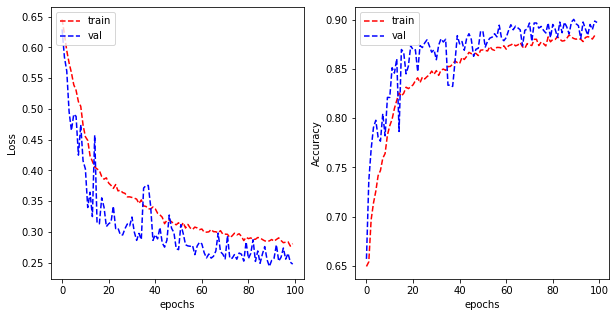

In [32]:
plot_learning_curve(history_isCancerous_4.history['loss'], history_isCancerous_4.history['val_loss'], 
                    history_isCancerous_4.history['categorical_accuracy'], history_isCancerous_4.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [33]:
reg_lambda = 0.001
model_isCancerous_5 = tf.keras.Sequential([    
    #VGG block 1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 2
    tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(.2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])
model_isCancerous_5.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last', 
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')



validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_isCancerous_5 = model_isCancerous_5.fit(train_generator, validation_data  = validation_generator, 
                                                epochs=100, verbose=1, callbacks=[reduce_lr, early_stop])

Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.
Epoch 1/100
381/381 [==============================] - 46s 119ms/step - loss: 0.6458 - categorical_accuracy: 0.6502 - val_loss: 0.6472 - val_categorical_accuracy: 0.6573 - lr: 0.0100
Epoch 2/100
381/381 [==============================] - 42s 110ms/step - loss: 0.6289 - categorical_accuracy: 0.6508 - val_loss: 0.6288 - val_categorical_accuracy: 0.6573 - lr: 0.0100
Epoch 3/100
381/381 [==============================] - 42s 110ms/step - loss: 0.6033 - categorical_accuracy: 0.6796 - val_loss: 0.6559 - val_categorical_accuracy: 0.6149 - lr: 0.0100
Epoch 4/100
381/381 [==============================] - 41s 107ms/step - loss: 0.5816 - categorical_accuracy: 0.7104 - val_loss: 0.4909 - val_categorical_accuracy: 0.7744 - lr: 0.0100
Epoch 5/100
381/381 [==============================] - 41s 107ms/step - loss: 0.5627 - categorical_accuracy: 0.7244 - val_loss: 0.4871 - val_cate

Epoch 45/100
381/381 [==============================] - 41s 107ms/step - loss: 0.3323 - categorical_accuracy: 0.8598 - val_loss: 0.2894 - val_categorical_accuracy: 0.8775 - lr: 0.0100
Epoch 46/100
381/381 [==============================] - 42s 110ms/step - loss: 0.3341 - categorical_accuracy: 0.8593 - val_loss: 0.3236 - val_categorical_accuracy: 0.8637 - lr: 0.0100
Epoch 47/100
381/381 [==============================] - 42s 110ms/step - loss: 0.3353 - categorical_accuracy: 0.8542 - val_loss: 0.2953 - val_categorical_accuracy: 0.8765 - lr: 0.0100
Epoch 48/100
381/381 [==============================] - 41s 108ms/step - loss: 0.3343 - categorical_accuracy: 0.8579 - val_loss: 0.2736 - val_categorical_accuracy: 0.8886 - lr: 0.0100
Epoch 49/100
381/381 [==============================] - 41s 109ms/step - loss: 0.3283 - categorical_accuracy: 0.8605 - val_loss: 0.3275 - val_categorical_accuracy: 0.8582 - lr: 0.0100
Epoch 50/100
381/381 [==============================] - 41s 107ms/step - loss: 0

381/381 [==============================] - 42s 110ms/step - loss: 0.2645 - categorical_accuracy: 0.8914 - val_loss: 0.2428 - val_categorical_accuracy: 0.9021 - lr: 0.0050
Epoch 90/100
381/381 [==============================] - 41s 108ms/step - loss: 0.2659 - categorical_accuracy: 0.8916 - val_loss: 0.2666 - val_categorical_accuracy: 0.8918 - lr: 0.0050
Epoch 91/100
381/381 [==============================] - 42s 110ms/step - loss: 0.2592 - categorical_accuracy: 0.8965 - val_loss: 0.2457 - val_categorical_accuracy: 0.9041 - lr: 0.0050
Epoch 92/100
381/381 [==============================] - 40s 106ms/step - loss: 0.2691 - categorical_accuracy: 0.8902 - val_loss: 0.2522 - val_categorical_accuracy: 0.8962 - lr: 0.0050
Epoch 93/100
381/381 [==============================] - 41s 108ms/step - loss: 0.2637 - categorical_accuracy: 0.8926 - val_loss: 0.2787 - val_categorical_accuracy: 0.8888 - lr: 0.0050
Epoch 94/100
381/381 [==============================] - 42s 110ms/step - loss: 0.2657 - categ

In [36]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')


test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

model_isCancerous_5.evaluate(test_generator)

Found 4056 validated image filenames belonging to 2 classes.
4056/4056 [==============================] - 14s 3ms/step - loss: 0.2325 - categorical_accuracy: 0.9038


[0.23247769474983215, 0.9038461446762085]

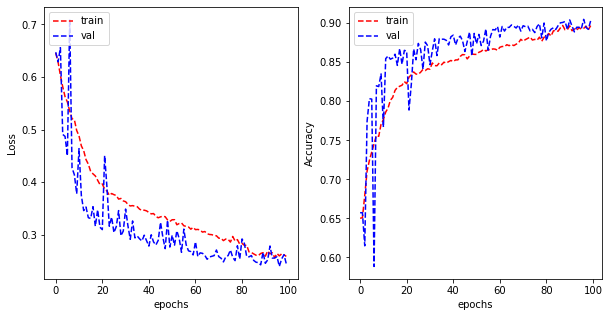

In [38]:
plot_learning_curve(history_isCancerous_5.history['loss'], history_isCancerous_5.history['val_loss'], 
                    history_isCancerous_5.history['categorical_accuracy'], history_isCancerous_5.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')